In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

#### Hyperparameters

In [12]:
HIDDEN_SIZE = 128
LEARNING_RATE = 0.001
EPOCHS = 75
BATCH_SIZE = 32


#### Load preprocessed data

In [13]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

#### Infer input and output sizes

In [14]:
INPUT_SIZE = X_train.shape[1]
OUTPUT_SIZE = y_train.shape[1]

#### Initialize weights with He initialization

In [15]:
W1 = np.random.randn(HIDDEN_SIZE, INPUT_SIZE) * np.sqrt(2.0 / INPUT_SIZE)
b1 = np.zeros((HIDDEN_SIZE, 1))
W2 = np.random.randn(OUTPUT_SIZE, HIDDEN_SIZE) * np.sqrt(2.0 / HIDDEN_SIZE)
b2 = np.zeros((OUTPUT_SIZE, 1))

#### Initialize weights with He initialization

In [16]:
def relu(Z):
    return np.maximum(0, Z)


def relu_derivative(Z):
    return Z > 0


def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0))
    return expZ / expZ.sum(axis=0, keepdims=True)


def forward_propagation(X):
    Z1 = np.dot(W1, X.T) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return A2, (Z1, A1, Z2, A2)


def compute_loss(Y, A2):
    m = Y.shape[0]
    log_probs = -np.log(A2.T[np.arange(m), np.argmax(Y, axis=1)] + 1e-9)
    return np.sum(log_probs) / m


def backward_propagation(X, Y, cache):
    Z1, A1, Z2, A2 = cache
    m = X.shape[0]

    dZ2 = A2.T - Y
    dW2 = np.dot(dZ2.T, A1.T) / m
    db2 = np.sum(dZ2.T, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2.T) * relu_derivative(Z1)
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2


def update_parameters(dW1, db1, dW2, db2):
    global W1, b1, W2, b2
    W1 -= LEARNING_RATE * dW1
    b1 -= LEARNING_RATE * db1
    W2 -= LEARNING_RATE * dW2
    b2 -= LEARNING_RATE * db2


def predict(X):
    A2, _ = forward_propagation(X)
    return np.argmax(A2, axis=0)


def batch_generator(X, y, batch_size):
    num_samples = X.shape[0]
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    for start_idx in range(0, num_samples, batch_size):
        end_idx = min(start_idx + batch_size, num_samples)
        batch_indices = indices[start_idx:end_idx]
        yield X[batch_indices], y[batch_indices]

#### Tracking metrics

In [17]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []


best_accuracy = 0
best_weights = {}

#### Tracking metrics

In [18]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

best_accuracy = 0
best_weights = {}

# Training loop
for epoch in range(EPOCHS):
    epoch_loss = 0
    batch_count = 0

    for X_batch, y_batch in batch_generator(X_train, y_train, BATCH_SIZE):
        A2, cache = forward_propagation(X_batch)
        loss = compute_loss(y_batch, A2)
        dW1, db1, dW2, db2 = backward_propagation(X_batch, y_batch, cache)
        update_parameters(dW1, db1, dW2, db2)
        epoch_loss += loss
        batch_count += 1

    avg_loss = epoch_loss / batch_count

    # Evaluate
    y_train_pred = predict(X_train)
    train_accuracy = np.mean(y_train_pred == np.argmax(y_train, axis=1)) * 100
    A2_train, _ = forward_propagation(X_train)
    train_loss = compute_loss(y_train, A2_train)

    y_test_pred = predict(X_test)
    test_accuracy = np.mean(y_test_pred == np.argmax(y_test, axis=1)) * 100
    A2_test, _ = forward_propagation(X_test)
    test_loss = compute_loss(y_test, A2_test)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(
        f"Epoch {epoch+1}: Loss = {avg_loss:.4f}, Train Acc = {train_accuracy:.2f}%, Test Acc = {test_accuracy:.2f}%"
    )

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_train_accuracy = train_accuracy  # Add this line

        best_weights = {
            "W1": W1.copy(),
            "b1": b1.copy(),
            "W2": W2.copy(),
            "b2": b2.copy(),
        }

Epoch 1: Loss = 1.5549, Train Acc = 31.98%, Test Acc = 28.90%
Epoch 2: Loss = 1.4243, Train Acc = 40.58%, Test Acc = 38.81%
Epoch 3: Loss = 1.3616, Train Acc = 45.95%, Test Acc = 44.48%
Epoch 4: Loss = 1.3224, Train Acc = 42.59%, Test Acc = 39.94%
Epoch 5: Loss = 1.2964, Train Acc = 44.96%, Test Acc = 41.93%
Epoch 6: Loss = 1.2714, Train Acc = 51.60%, Test Acc = 47.31%
Epoch 7: Loss = 1.2456, Train Acc = 53.07%, Test Acc = 50.42%
Epoch 8: Loss = 1.2254, Train Acc = 47.13%, Test Acc = 44.76%
Epoch 9: Loss = 1.2026, Train Acc = 54.79%, Test Acc = 51.84%
Epoch 10: Loss = 1.1959, Train Acc = 55.32%, Test Acc = 52.69%
Epoch 11: Loss = 1.1736, Train Acc = 50.08%, Test Acc = 47.03%
Epoch 12: Loss = 1.1522, Train Acc = 52.25%, Test Acc = 49.58%
Epoch 13: Loss = 1.1441, Train Acc = 50.00%, Test Acc = 43.34%
Epoch 14: Loss = 1.1260, Train Acc = 61.47%, Test Acc = 53.82%
Epoch 15: Loss = 1.1060, Train Acc = 53.11%, Test Acc = 48.73%
Epoch 16: Loss = 1.1017, Train Acc = 55.45%, Test Acc = 49.01%
E

#### Save best weights

In [19]:
# Save best weights
np.save("W1_furniture.npy", best_weights["W1"])
np.save("b1_furniture.npy", best_weights["b1"])
np.save("W2_furniture.npy", best_weights["W2"])
np.save("b2_furniture.npy", best_weights["b2"])
print(f"\nBest model saved with accuracy: {best_accuracy:.2f}%")


Best model saved with accuracy: 71.67%


#### Plot accuracy and loss

Best epoch: 73
Training Accuracy at best epoch: 85.42%
Test Accuracy at best epoch: 71.67%


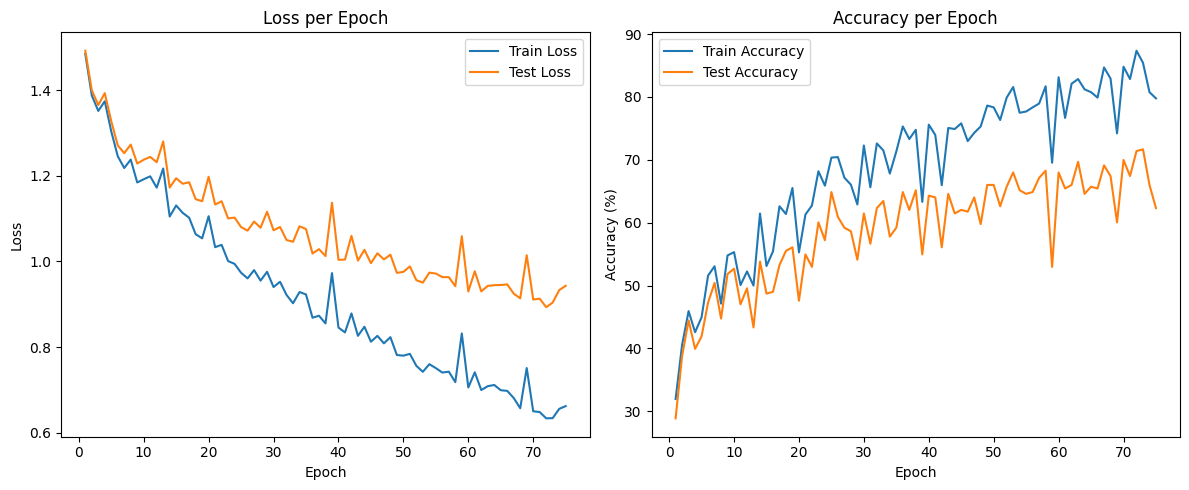

In [20]:
epochs_range = np.arange(1, EPOCHS + 1)


best_epoch = np.argmax(test_accuracies)
print(f"Best epoch: {best_epoch + 1}")
print(f"Training Accuracy at best epoch: {train_accuracies[best_epoch]:.2f}%")
print(f"Test Accuracy at best epoch: {test_accuracies[best_epoch]:.2f}%")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.plot(epochs_range, test_losses, label="Test Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label="Train Accuracy")
plt.plot(epochs_range, test_accuracies, label="Test Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()